# Evaluate ADMM method
This notebook explores the results of evaluating the ADMM and SunSalTV algorithm with different hyperparameters and data conditions

Copyright (c) 2024 University of Strasbourg
Author: Massyl Moudoud <mmoudoud@unistra.fr> 
Contributor(s) : Céline Meillier <meillier@unistra.fr>, Vincent Mazet <vincent.mazet@unistra.fr>

This work has been supported by the ANR project DynaSTI: ANR-22-CE45-0008

This software is governed by the CeCILL  license under French law and
abiding by the rules of distribution of free software.  You can  use, 
modify and/ or redistribute the software under the terms of the CeCILL
license as circulated by CEA, CNRS and INRIA at the following URL
"http://www.cecill.info". 

As a counterpart to the access to the source code and  rights to copy,
modify and redistribute granted by the license, users are provided only
with a limited warranty  and the software's author,  the holder of the
economic rights,  and the successive licensors  have only  limited
liability. 

In this respect, the user's attention is drawn to the risks associated
with loading,  using,  modifying and/or developing or reproducing the
software by the user in light of its specific status of free software,
that may mean  that it is complicated to manipulate,  and  that  also
therefore means  that it is reserved for developers  and  experienced
professionals having in-depth computer knowledge. Users are therefore
encouraged to load and test the software's suitability as regards their
requirements in conditions enabling the security of their systems and/or 
data to be ensured and,  more generally, to use and operate it in the 
same conditions as regards security. 

The fact that you are presently reading this means that you have had
knowledge of the CeCILL license and that you accept its terms.

In [1]:
#Imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os

functionPath = "../../src"
sys.path.append(functionPath)

In [2]:
#disable warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = "./optimization_results/simulation/"

# Effect of $\lambda_{\ell_1}$ and $\lambda_{TV}$ hyperparameters

In [4]:
snr_val = 0

#load results
res_A_D = np.load(path +f"result_A_D_SNR_{snr_val}_mu_1.npy" , allow_pickle = True)

#keep track of the variables names in the array
idx_to_var = {idx : var for idx ,var in enumerate(res_A_D[0].keys())}
var_to_idx = {var : idx for idx ,var in enumerate(res_A_D[0].keys())}

result_A_D_DF = pd.DataFrame.from_records(data = res_A_D)


In [5]:
def plots_paper(DF, cmap,  path  = None):
    """
    Plots the graphics for the paper writing (Eusipco 2024)
    """
    
    colors_loss = ["orange" , "lime" , "deepskyblue"]
    markers_loss = ["o", "P" , "s"]
    #errors_vars =["err_D" , "err_A", "err_C" ]
    #labels = [r"$\mathbf{D}_{\min}$", r"$\mathbf{A}_{\min}$", r"$\mathbf{C}_{\min}$"]
    
    errors_vars =["err_C" , "err_D", "err_A" ]
    labels = [r"$\mathbf{C}_{\min}$", r"$\mathbf{D}_{\min}$", r"$\mathbf{A}_{\min}$"]
    
    #limit range of values for L1 and TV
    #DF = DF.query("lambda_l1 <= 0.205 and lambda_TV <= 1.03")
    DF = DF.query("lambda_l1 <= 10 and lambda_TV <= 1.2")
    
    
    lambda_l1_vals = np.unique(DF["lambda_l1"])
    lambda_TV_vals = np.unique(DF["lambda_TV"])


    err_A = np.zeros((len(lambda_l1_vals), len(lambda_TV_vals)))
    err_D = np.zeros((len(lambda_l1_vals), len(lambda_TV_vals)))
    err_C = np.zeros((len(lambda_l1_vals), len(lambda_TV_vals)))
    
    for i, L1 in enumerate(lambda_l1_vals):
        for j, TV in enumerate(lambda_TV_vals):
            tmp = DF.query(f"lambda_l1 == {L1} and lambda_TV == {TV}")
            err_A[i , j] = tmp["err_A"]
            err_D[i , j] = tmp["err_D"]
            err_C[i , j] = tmp["err_C"]

    tmp = DF.to_numpy()
    min_l1 , min_TV = [],  []

    for err_var in errors_vars:
            i = var_to_idx[err_var]
            min_l1.append(tmp[np.argmin(tmp[:, i]), var_to_idx["lambda_l1"]])
            min_TV.append(tmp[np.argmin(tmp[:, i]), var_to_idx["lambda_TV"]])
            
            
    plt.figure(layout = "constrained" , figsize=(18, 4.5))
    #plt.figure(layout = "tight" , figsize=(18, 4.5))
    #################################################################################################
    ax1 = plt.subplot(141)
    plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, err_C , shading = 'gouraud', cmap= cmap)
    plt.colorbar()
    for k , err_var in enumerate(errors_vars):
        plt.scatter(min_TV[k], min_l1[k] , s = 400, marker = markers_loss[k] , color = colors_loss[k])
    #plt.ylabel(r"$\lambda_{\ell_1}$")
    plt.xlabel(r"$\lambda_{TV}$")
    plt.ylabel(r"$\lambda_{\ell_1}$" )
    #plt.xticks([0 , 0.25, 0.5, 0.75, 1])#Selected by hand for better visualization
    plt.title(r"$||\mathbf{C} - \hat{\mathbf{C}}||_{F}$")
    
    
    #################################################################################################
    plt.subplot(142 , sharex = ax1 )
    plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, err_D ,cmap=cmap, shading = 'gouraud')#
    plt.colorbar()
    for k , err_var in enumerate(errors_vars):
        plt.scatter(min_TV[k], min_l1[k] , s = 400, marker = markers_loss[k] , color = colors_loss[k] , label = labels[k])
    plt.xlabel(r"$\lambda_{TV}$")
    plt.title(r"$||\mathbf{D} - \hat{\mathbf{D}}||_{F}$")
    plt.yticks([])
    
    #################################################################################################
    plt.subplot(143 , sharex = ax1)
    plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, err_A ,shading = 'gouraud', cmap=cmap)
    plt.colorbar()
    for k , err_var in enumerate(errors_vars):
        plt.scatter(min_TV[k], min_l1[k] , s = 400, marker = markers_loss[k] , color = colors_loss[k])
    #plt.ylabel(r"$\lambda_{\ell_1}$")
    plt.xlabel(r"$\lambda_{TV}$")
    plt.title(r"$||\mathbf{A} - \hat{\mathbf{A}}||_{F}$")
    plt.yticks([])
    #################################################################################################

    ax4 = plt.subplot(144, box_aspect =7)
    ax4.axis('off')
    plt.figlegend(loc=(0.84, 0.4))

    
    if path != None:
        plt.savefig(path)
    
    plt.show()

In [6]:
plt.rcParams.update({'font.size': 20})

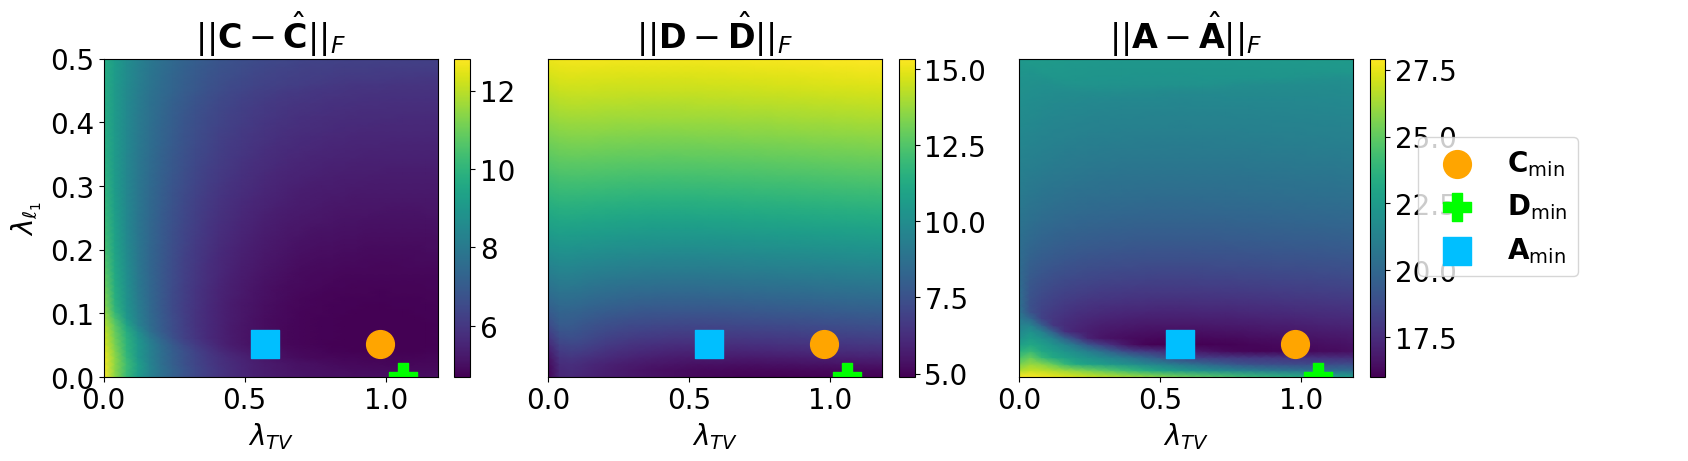

In [7]:
plots_paper(result_A_D_DF, cmap = 'viridis')#,  path  = "./figs/L1_TV_SNR_0_mu_1.pdf")

# Plot presentation Eusipco 2024

In [46]:
def plots_presentation(DF, cmap,  path  = None):
    """
    Plots the graphics for the paper writing (Eusipco 2024)
    """
    
    colors_loss = ["orange" , "lime" , "deepskyblue"]
    markers_loss = ["o", "P" , "s"]
    #errors_vars =["err_D" , "err_A", "err_C" ]
    #labels = [r"$\mathbf{D}_{\min}$", r"$\mathbf{A}_{\min}$", r"$\mathbf{C}_{\min}$"]
    
    errors_vars =["err_C" , "err_D", "err_A" ]
    labels = [r"$\mathbf{C}_{\min}$", r"$\mathbf{D}_{\min}$", r"$\mathbf{A}_{\min}$"]
    
    #limit range of values for L1 and TV
    #DF = DF.query("lambda_l1 <= 0.205 and lambda_TV <= 1.03")
    DF = DF.query("lambda_l1 <= 10 and lambda_TV <= 1.2")
    
    
    lambda_l1_vals = np.unique(DF["lambda_l1"])
    lambda_TV_vals = np.unique(DF["lambda_TV"])


    err_A = np.zeros((len(lambda_l1_vals), len(lambda_TV_vals)))
    err_D = np.zeros((len(lambda_l1_vals), len(lambda_TV_vals)))
    err_C = np.zeros((len(lambda_l1_vals), len(lambda_TV_vals)))
    
    for i, L1 in enumerate(lambda_l1_vals):
        for j, TV in enumerate(lambda_TV_vals):
            tmp = DF.query(f"lambda_l1 == {L1} and lambda_TV == {TV}")
            err_A[i , j] = tmp["err_A"]
            err_D[i , j] = tmp["err_D"]
            err_C[i , j] = tmp["err_C"]

    tmp = DF.to_numpy()
    min_l1 , min_TV = [],  []

    for err_var in errors_vars:
            i = var_to_idx[err_var]
            min_l1.append(tmp[np.argmin(tmp[:, i]), var_to_idx["lambda_l1"]])
            min_TV.append(tmp[np.argmin(tmp[:, i]), var_to_idx["lambda_TV"]])
            
            
    plt.figure(layout = "constrained" , figsize=(18, 9))
    #plt.figure(layout = "tight" , figsize=(18, 4.5))
    #################################################################################################
    ax1 = plt.subplot(231)
    plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, err_C , shading = 'gouraud', cmap= cmap)
    plt.colorbar()
    for k , err_var in enumerate(errors_vars):
        plt.scatter(min_TV[k], min_l1[k] , s = 400, marker = markers_loss[k] , color = colors_loss[k])
    #plt.ylabel(r"$\lambda_{\ell_1}$")
    plt.xlabel(r"$\lambda_{TV}$")
    plt.ylabel(r"$\lambda_{\ell_1}$" )
    #plt.xticks([0 , 0.25, 0.5, 0.75, 1])#Selected by hand for better visualization
    plt.title(r"$||\mathbf{C} - \hat{\mathbf{C}}||_{F}$")
    
    
    #################################################################################################
    plt.subplot(232 , sharex = ax1 )
    plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, err_D ,cmap=cmap, shading = 'gouraud')#
    plt.colorbar()
    for k , err_var in enumerate(errors_vars):
        plt.scatter(min_TV[k], min_l1[k] , s = 400, marker = markers_loss[k] , color = colors_loss[k] , label = labels[k])
    plt.xlabel(r"$\lambda_{TV}$")
    plt.title(r"$||\mathbf{D} - \hat{\mathbf{D}}||_{F}$")
    plt.yticks([])
    
    #################################################################################################
    plt.subplot(233 , sharex = ax1)
    plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, err_A ,shading = 'gouraud', cmap=cmap)
    plt.colorbar(label = "Reconstruction error")
    for k , err_var in enumerate(errors_vars):
        plt.scatter(min_TV[k], min_l1[k] , s = 400, marker = markers_loss[k] , color = colors_loss[k])
    #plt.ylabel(r"$\lambda_{\ell_1}$")
    plt.xlabel(r"$\lambda_{TV}$")
    plt.title(r"$||\mathbf{A} - \hat{\mathbf{A}}||_{F}$")
    plt.yticks([])
    #################################################################################################
    #hide additional subplots
    ax4 = plt.subplot(235)#, box_aspect =7)
    ax4.axis('off')
    
    
    
    plt.figlegend(loc=(0.4, 0.15), fontsize=35 , markerscale = 2)

    
    if path != None:
        plt.savefig(path)
    
    plt.show()

In [47]:
plt.rcParams.update({'font.size': 25})

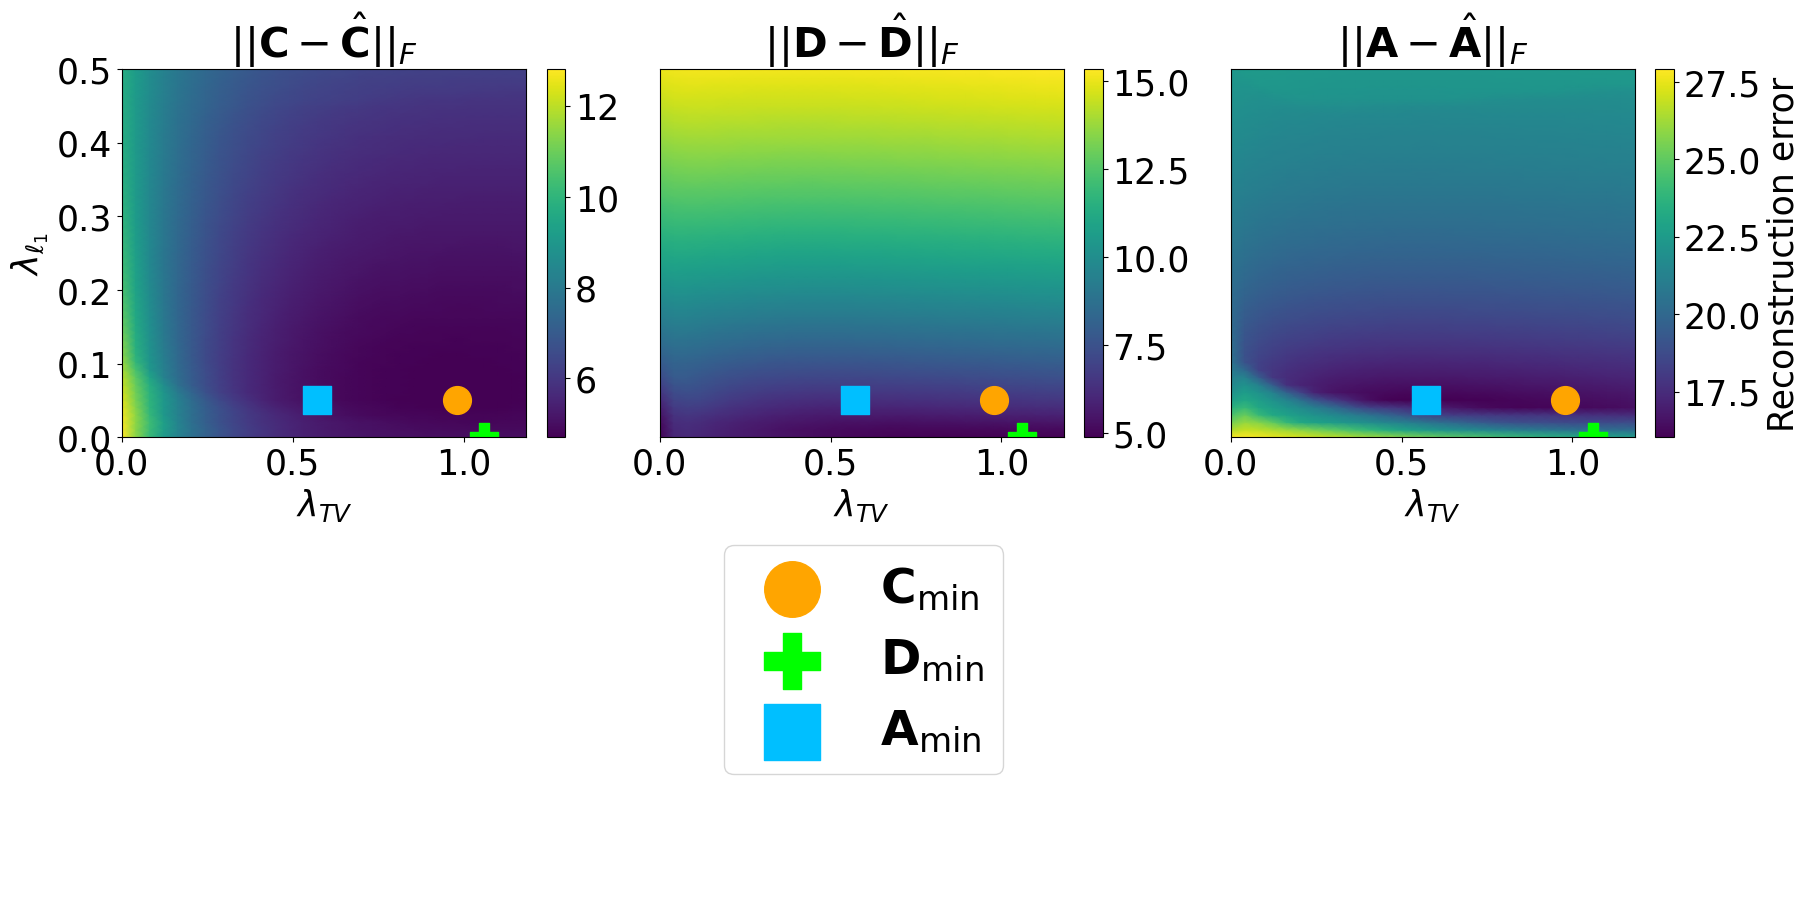

In [49]:
plots_presentation(result_A_D_DF, cmap = 'viridis',  path  = "./figs/Presentation_L1_TV_SNR_0_mu_1.pdf")

# Multiple generated data

In [12]:
path = "./optimization_results/simulation/result_A_D_multirealizations.npy"

In [13]:
res_A_D_realizations = np.load(path , allow_pickle = True)
Nb_realizations = len(res_A_D_realizations)

In [14]:
#extract grid search parameters
res_A_D = res_A_D_realizations[0]['result']
result_A_D =np.zeros((len(res_A_D) , len(res_A_D[0].keys())))
for i , res in enumerate(res_A_D):
    result_A_D[i, :] = [elem for elem in res.values()]

#keep track of the variables names in the array
idx_to_var = {idx : var for idx ,var in enumerate(res_A_D[0].keys())}
var_to_idx = {var : idx for idx ,var in enumerate(res_A_D[0].keys())}

#phase graph
lambda_l1_vals = np.unique(result_A_D[:, var_to_idx["lambda_l1"]])
lambda_TV_vals = np.unique(result_A_D[:, var_to_idx["lambda_TV"]])
mu_vals = np.unique(result_A_D[:, var_to_idx["mu"]])

In [15]:
err_C = np.zeros((len(lambda_l1_vals), len(lambda_TV_vals) , Nb_realizations))
err_A = np.zeros((len(lambda_l1_vals), len(lambda_TV_vals) , Nb_realizations))
err_D = np.zeros((len(lambda_l1_vals), len(lambda_TV_vals) , Nb_realizations))
min_l1 = np.zeros(Nb_realizations)
min_TV = np.zeros(Nb_realizations)

sparsity_A = np.zeros(Nb_realizations )
factor = np.zeros(Nb_realizations )



for s_id, res_A_D in enumerate(res_A_D_realizations):
    #convert results list of dicts to an array 
    result = res_A_D['result']
    result_A_D =np.zeros((len(result) , len(result[0].keys())))
    for i , res in enumerate(result):
        result_A_D[i, :] = [elem for elem in res.values()]
    

    result_A_D_DF = pd.DataFrame.from_records(data = result)
    for i, L1 in enumerate(lambda_l1_vals):
        for j, TV in enumerate(lambda_TV_vals):
            tmp = result_A_D_DF.query(f"lambda_l1 == {L1} and lambda_TV == {TV}")
            err_C[i , j , s_id] = tmp["err_C"]
            err_A[i , j , s_id] = tmp["err_A"]
            err_D[i , j , s_id] = tmp["err_D"]

    i = var_to_idx["err_C"]
    min_l1[s_id] = result_A_D[np.argmin(result_A_D[:, i]), var_to_idx["lambda_l1"]]
    min_TV[s_id] = result_A_D[np.argmin(result_A_D[:, i]), var_to_idx["lambda_TV"]]
    sparsity_A[s_id] = np.count_nonzero(res_A_D["A"])
    factor[s_id] = result_A_D[np.argmin(result_A_D[:, i]), var_to_idx["factor"]]

Text(0.5, 0.98, 'Standard deviation of the error accross mutliple datasets')

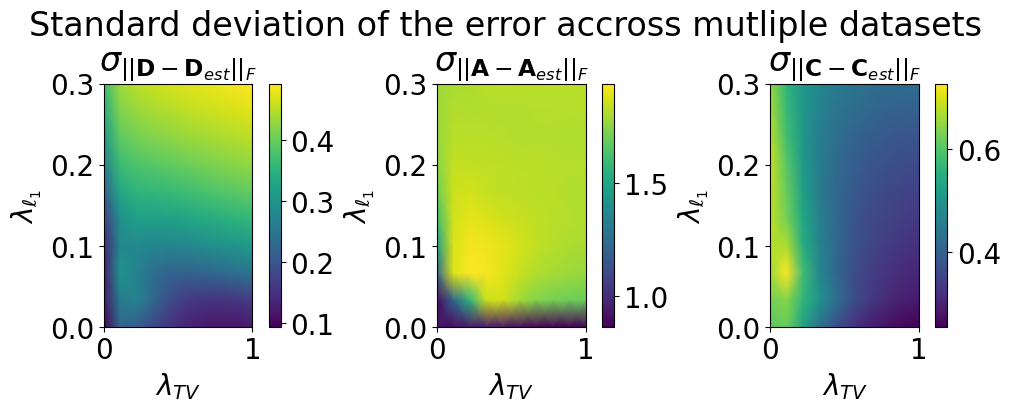

In [16]:
plt.figure(layout = "constrained" , figsize=(10, 4))
plt.subplot(131)
plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, np.std(err_D , axis =2),shading = 'gouraud' )
plt.colorbar()
plt.ylabel(r"$\lambda_{\ell_1}$" )
plt.xlabel(r"$\lambda_{TV}$")
plt.title(r"$\sigma_{||\mathbf{D} - \mathbf{D}_{est}||_{F}}$")
plt.subplot(132)
plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, np.std(err_A , axis =2),shading = 'gouraud')
plt.colorbar()
plt.ylabel(r"$\lambda_{\ell_1}$")
plt.xlabel(r"$\lambda_{TV}$")
plt.title(r"$\sigma_{||\mathbf{A} - \mathbf{A}_{est}||_{F}}$")
plt.subplot(133)
plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, np.std(err_C , axis =2) , shading = 'gouraud')
plt.colorbar()
plt.ylabel(r"$\lambda_{\ell_1}$")
plt.xlabel(r"$\lambda_{TV}$")
plt.title(r"$\sigma_{||\mathbf{C} - \mathbf{C}_{est}||_{F}}$")
plt.suptitle("Standard deviation of the error accross mutliple datasets")

Text(0.5, 0.98, 'Average error accross mutliple datasets')

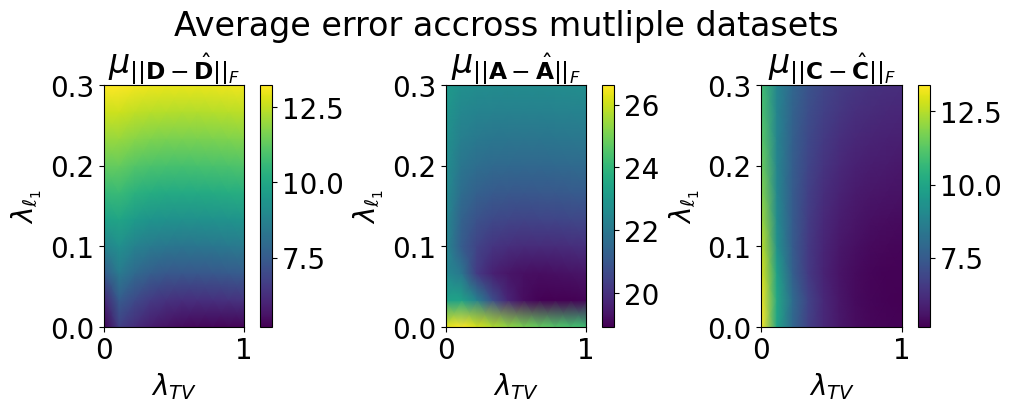

In [19]:
plt.figure(layout = "constrained" , figsize=(10, 4))
plt.subplot(131)
plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, np.mean(err_D , axis =2),shading = 'gouraud' )
plt.colorbar()
plt.ylabel(r"$\lambda_{\ell_1}$" )
plt.xlabel(r"$\lambda_{TV}$")
plt.title(r"$\mu_{||\mathbf{D} - \hat{\mathbf{D}}||_{F}}$")
plt.subplot(132)
plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, np.mean(err_A , axis =2),shading = 'gouraud')
plt.colorbar()
plt.ylabel(r"$\lambda_{\ell_1}$")
plt.xlabel(r"$\lambda_{TV}$")
plt.title(r"$\mu_{||\mathbf{A} - \hat{\mathbf{A}}||_{F}}$")
plt.subplot(133)
plt.pcolormesh(lambda_TV_vals , lambda_l1_vals, np.mean(err_C , axis =2) , shading = 'gouraud')
plt.colorbar()
plt.ylabel(r"$\lambda_{\ell_1}$")
plt.xlabel(r"$\lambda_{TV}$")
plt.title(r"$\mu_{||\mathbf{C} - \hat{\mathbf{C}}||_{F}}$")
plt.suptitle("Average error accross mutliple datasets")